# Heart Disease UCI Project
## Launch Code - Coder Girl Program
### Data Science Cohort Jan 2020

The purpose of this project was to do an exploratory analysis of the data set and create a predictive model based off our exploration to predict the likelihood of heart disease based upon given features.

All data came from this [Heart Disease UCI](https://www.kaggle.com/ronitf/heart-disease-uci) data set from Kaggle.

## Exploratory Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv ('C:/Users/Renee/Documents/Dev/heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df.shape

(303, 14)

In [4]:
#count the number of missing values in each column
#because there are no missing values, I do not have to immediately drop or fill anything
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
#How many heart disease cases do we have in this set?
#138 have heart disease
#165 do not have heart disease
df ['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [6]:
#break that out by sex
df.groupby('sex')['target'].value_counts()

sex  target
0    1          72
     0          24
1    0         114
     1          93
Name: target, dtype: int64

### Identify and Remove Outliers
Identified and removed outliers using interquartile range.

In [7]:
#Current data frame
df.shape

(303, 14)

The features __trestbps, chol, and thalach__ all have larger ranges. I decided to create boxplots to determine whether or not outliers existed.

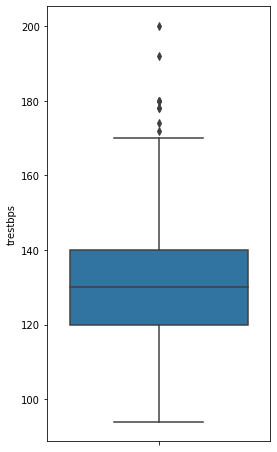

In [8]:
plt.figure(figsize = (4,8))
sns.boxplot(y = df.trestbps)

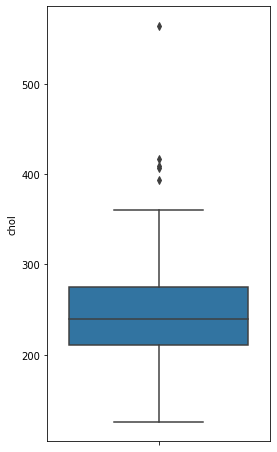

In [9]:
plt.figure(figsize = (4,8))
sns.boxplot(y = df.chol)

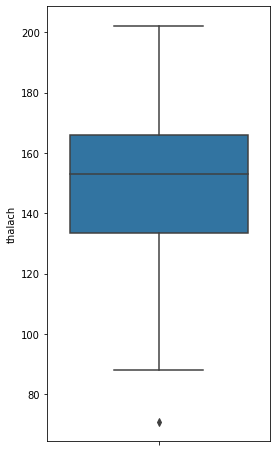

In [10]:
plt.figure(figsize = (4,8))
sns.boxplot(y = df.thalach)

The features __trestbps, chol, and thalach__ all have outliers.
 - trestbps and chol have outliers on the upper end
 - thalach has outliers on the lower end

In [11]:
#Removing trestbps outliers    
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df1 = pd.DataFrame(df['trestbps'])
df1 = df1[~((df1 < (Q1 - 1.5 * IQR)) |(df1 > (Q3 + 1.5 * IQR))).any(axis=1)]
df1.shape
df = df.drop(['trestbps'],axis=1)
df = df.join(df1)

#Drop outlier rows
df = df.dropna(axis=0, subset=['trestbps'])
df.shape

(294, 14)

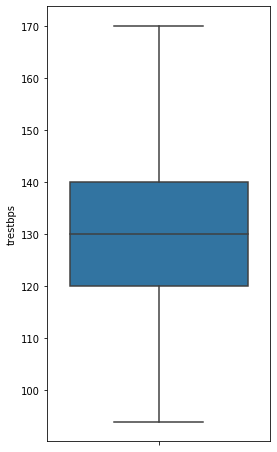

In [12]:
#Confirm trestbps outliers removed
plt.figure(figsize = (4,8))
sns.boxplot(y = df.trestbps)

In [13]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df1 = pd.DataFrame(df['chol'])
df1 = df1[~((df1 < (Q1 - 1.5 * IQR)) |(df1 > (Q3 + 1.5 * IQR))).any(axis=1)]
df1.shape
df = df.drop(['chol'],axis=1)
df = df.join(df1)

#Drop outlier rows
df = df.dropna(axis=0, subset=['chol'])
df.shape

(289, 14)

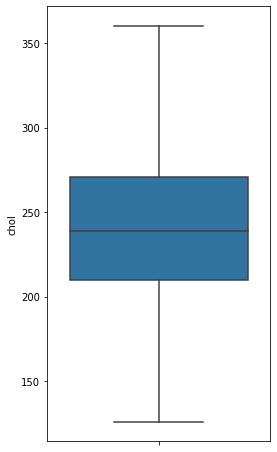

In [14]:
#Confirm chol outliers removed
plt.figure(figsize = (4,8))
sns.boxplot(y = df.chol)

In [15]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df1 = pd.DataFrame(df['thalach'])
df1 = df1[~((df1 < (Q1 - 1.5 * IQR)) |(df1 > (Q3 + 1.5 * IQR))).any(axis=1)]
df1.shape
df = df.drop(['thalach'],axis=1)
df = df.join(df1)

#Drop outlier rows
df = df.dropna(axis=0, subset=['thalach'])
df.shape

(288, 14)

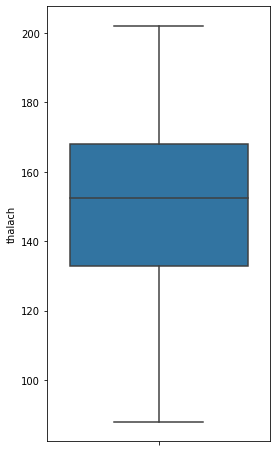

In [16]:
#Confirm thalach outliers removed
plt.figure(figsize = (4,8))
sns.boxplot(y = df.thalach)

After removing outliers, we have lost 15 patients from our data frame total (from 303 to 288).

## Generating Visual Plots through PLT and SNS
These visualizations were created to identify any clear correlations between the feature __target__ (heart disease positive) and any other features.

### Examining Catgorized Features
Features: Sex, CP, fbs, restecg, exang, slope, thal

#### Sex
Notes:
 - There are more male patients in this data set. More men than women tend to have heart disease, although our data may be skewed.

In [17]:
df['sex'].value_counts()

1    202
0     86
Name: sex, dtype: int64

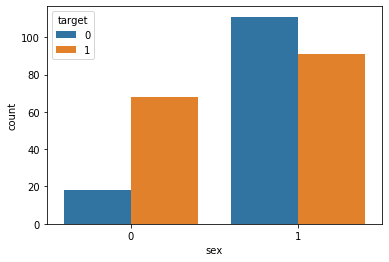

In [18]:
#0 = female, 1 = male
sns.countplot(x="sex", hue="target", data=df)


#### CP (Chest Pain Type)
 - 0 = asymptomatic
 - 1 = atypical angina
 - 2 = pain without relation to angina
 - 3: typical angina
 
Notes:
 - There are more patients with heart disease who have the chest pain types 0

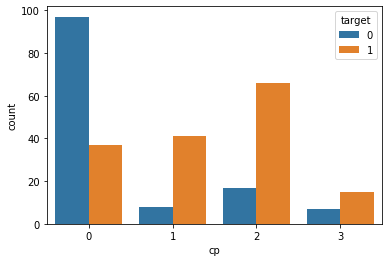

In [19]:
sns.countplot(x="cp", hue="target", data=df)

#### FBS (Fasting Blood Sugar)
 - 0 = sugar level is NOT > 120 mg/dl
 - 1 = sugar level is > 120 mg/dl
Notes:
 - It looks as though there is about a 50/50 chance that the patient has heart disease regardless of their fasting blood sugar.

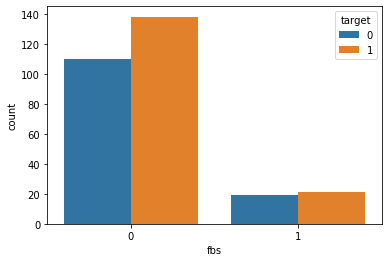

In [20]:
sns.countplot(x="fbs", hue="target", data=df)

#### RestECG (Resting Electrocardiographic Results)
 - 0 = probable left ventricular hypertrophy
 - 1 = normal
 - 2 = abnormalities in the T wave or ST segment
Notes:
 - Most patients have restecg 0 and 1 results.
 - More patients with heart disease have restecg results of 0.
 - More patients without heart disease have restect results of 1.

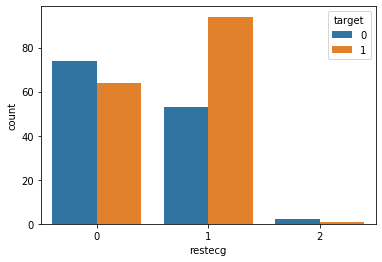

In [21]:
sns.countplot(x="restecg", hue="target", data=df)

#### ExAng (Exercise Induced Angina)
1 = yes; 0 = no
Notes: 
 - Most patients who did not have heart disease also did NOT have exercise induced angina (0).
 - Most heart disease positive students had have exercise induced angina (1), although this is a less significant difference.

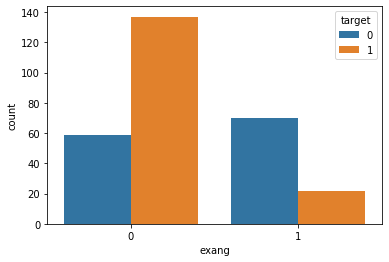

In [22]:
sns.countplot(x="exang", hue="target", data=df)

#### Slope
Slope of the ST segment during the most demanding part of exercise.
 - 0 = descending
 - 1 = flat
 - 2 = ascending
 
 Notes:
  - A majority of heart disease patients have flat slopes.

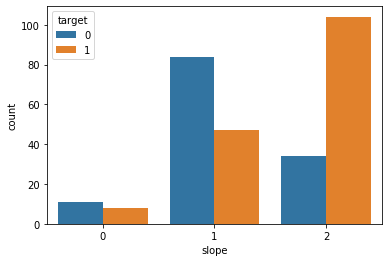

In [23]:
sns.countplot(x="slope", hue="target", data=df)

#### Thal
The blood flow observed in radioactive dye.
 - 0 = NULL (dropped previously from dataset)
 - 1 = fixed defect (no blood flow in some part of the heart)
 - 2 = normal blood flow
 - 3 = reversible defect (a blood flow is observed but abnormal)

Notes:
  - Most heart disease positive patients had a reversible defect (3) or normal blood flow.
  - A majority of heart disease negative patients had normal blood flow (2).

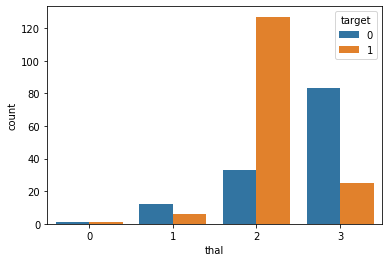

In [24]:
sns.countplot(x="thal", hue="target", data=df)

#### CA
The number of main blood vessels coloured by the radioactive dye.
 - 4 = null value (previously dropped).
 Notes:
 - Most heart rate negative patients have 0.

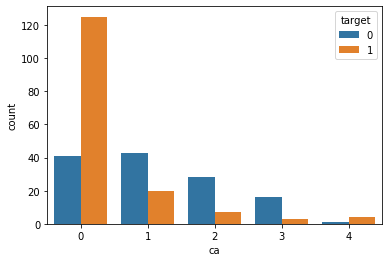

In [25]:
sns.countplot(x="ca", hue="target", data=df)

### Examining Non-Categorical Features
Features: age, trestbps, chol, thalach, oldpeak

#### Age v. Target
Notes:
 - Clear peak for Heart Disease Positive patients (around 65).

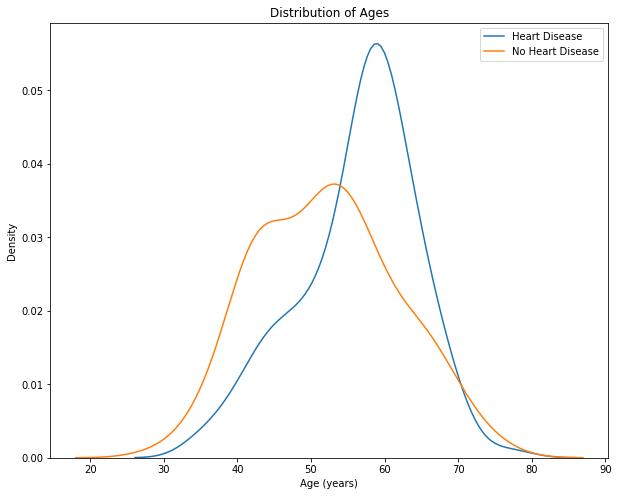

In [26]:
#Set figure size
plt.figure(figsize = (10, 8))

#Two KDE plots on same figure
sns.kdeplot(df.loc[df['target'] == 0, 'age'], label = 'Heart Disease')
sns.kdeplot(df.loc[df['target'] == 1, 'age'], label = 'No Heart Disease')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

#### Trestbps v. Target
Notes:
 - Peak occurs at similar trestps for patients with and without heart disease.

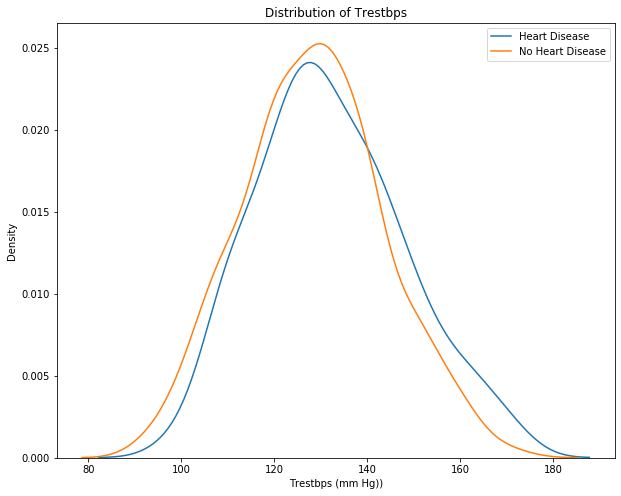

In [27]:
#Set figure size
plt.figure(figsize = (10, 8))

#Two KDE plots on same figure
sns.kdeplot(df.loc[df['target'] == 0, 'trestbps'], label = 'Heart Disease')
sns.kdeplot(df.loc[df['target'] == 1, 'trestbps'], label = 'No Heart Disease')

# Labeling of plot
plt.xlabel('Trestbps (mm Hg))'); plt.ylabel('Density'); plt.title('Distribution of Trestbps');

#### Chol v. Target
Notes:
- Clear peak for both heart disease positive and heart disease negative patients.
- The peak for heart disease negative patients occurs at a lower cholesterol level, although there are still many negative cases at the peak of positive patients.

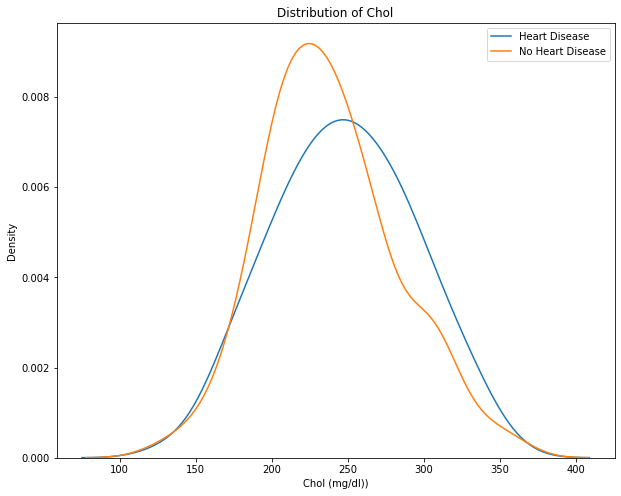

In [28]:
#Set figure size
plt.figure(figsize = (10, 8))

#Two KDE plots on same figure
sns.kdeplot(df.loc[df['target'] == 0, 'chol'], label = 'Heart Disease')
sns.kdeplot(df.loc[df['target'] == 1, 'chol'], label = 'No Heart Disease')

# Labeling of plot
plt.xlabel('Chol (mg/dl))'); plt.ylabel('Density'); plt.title('Distribution of Chol');

#### Thalach v. Target
 - Thalach is the max heart rate during the stress test.
 Notes:
  - Heart disease negative patients have a later HR peak (around 175) than heart disease positive patients (peak around 150).

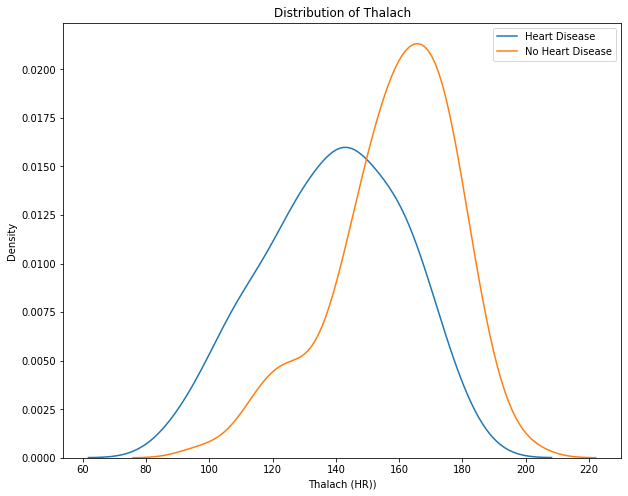

In [29]:
#Set figure size
plt.figure(figsize = (10, 8))

#Two KDE plots on same figure
sns.kdeplot(df.loc[df['target'] == 0, 'thalach'], label = 'Heart Disease')
sns.kdeplot(df.loc[df['target'] == 1, 'thalach'], label = 'No Heart Disease')

# Labeling of plot
plt.xlabel('Thalach (HR))'); plt.ylabel('Density'); plt.title('Distribution of Thalach');

#### Oldpeak v. Target
 - Oldpeak is the decrease of the ST segment during exercise according to the same one on rest.
Notes:
 - There is a clear peak for heart disease negative patients, and the decrease for overall is lower than that for heart disease positive patients.

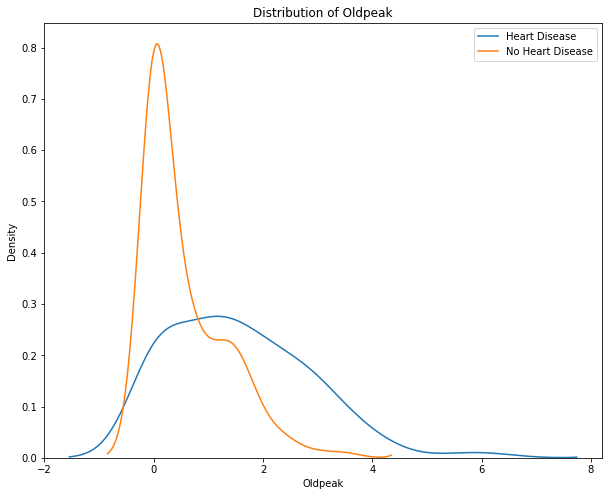

In [30]:
#Set figure size
plt.figure(figsize = (10, 8))

#Two KDE plots on same figure
sns.kdeplot(df.loc[df['target'] == 0, 'oldpeak'], label = 'Heart Disease')
sns.kdeplot(df.loc[df['target'] == 1, 'oldpeak'], label = 'No Heart Disease')

# Labeling of plot
plt.xlabel('Oldpeak'); plt.ylabel('Density'); plt.title('Distribution of Oldpeak');

Conclusion:
 - It is not necessary to continue considering the features __fbs__ as a determining feature for heart disease.
 - __restecg, trestbps, and chol__ do not appear to have significant affects on 'Target'.

### Looking at Correlations Between Features

<function matplotlib.pyplot.show(*args, **kw)>

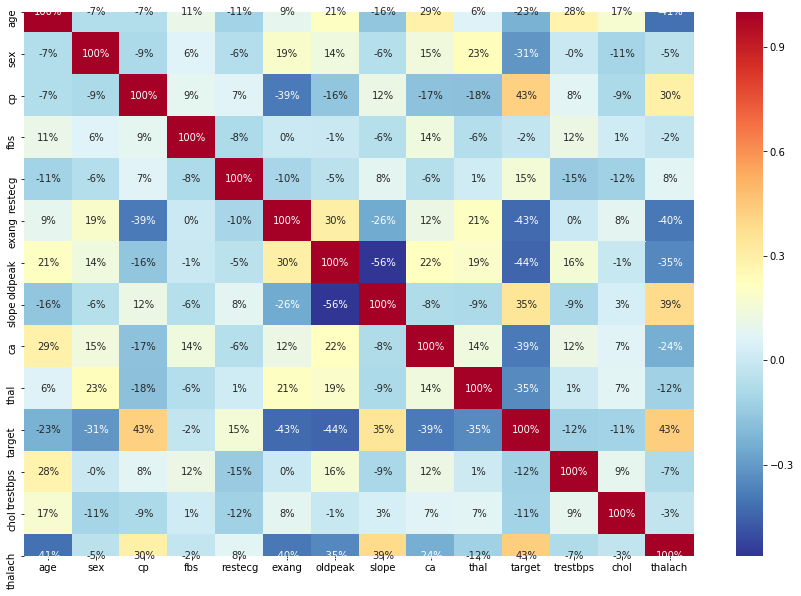

In [31]:
correlations = df.corr()
# df.corr() helps you see what features may have a strong correlation, but difficult to see. Use a heatmap!
plt.figure(figsize=(15,10))
sns.heatmap(df.iloc[:,0:15].corr(), annot=True, fmt=".0%", cmap = plt.cm.RdYlBu_r) #used colormap cmap to identify clearer correlations
plt.show
#Looks like strong correlations between slope and oldpeak

C:\Users\Renee\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Renee\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


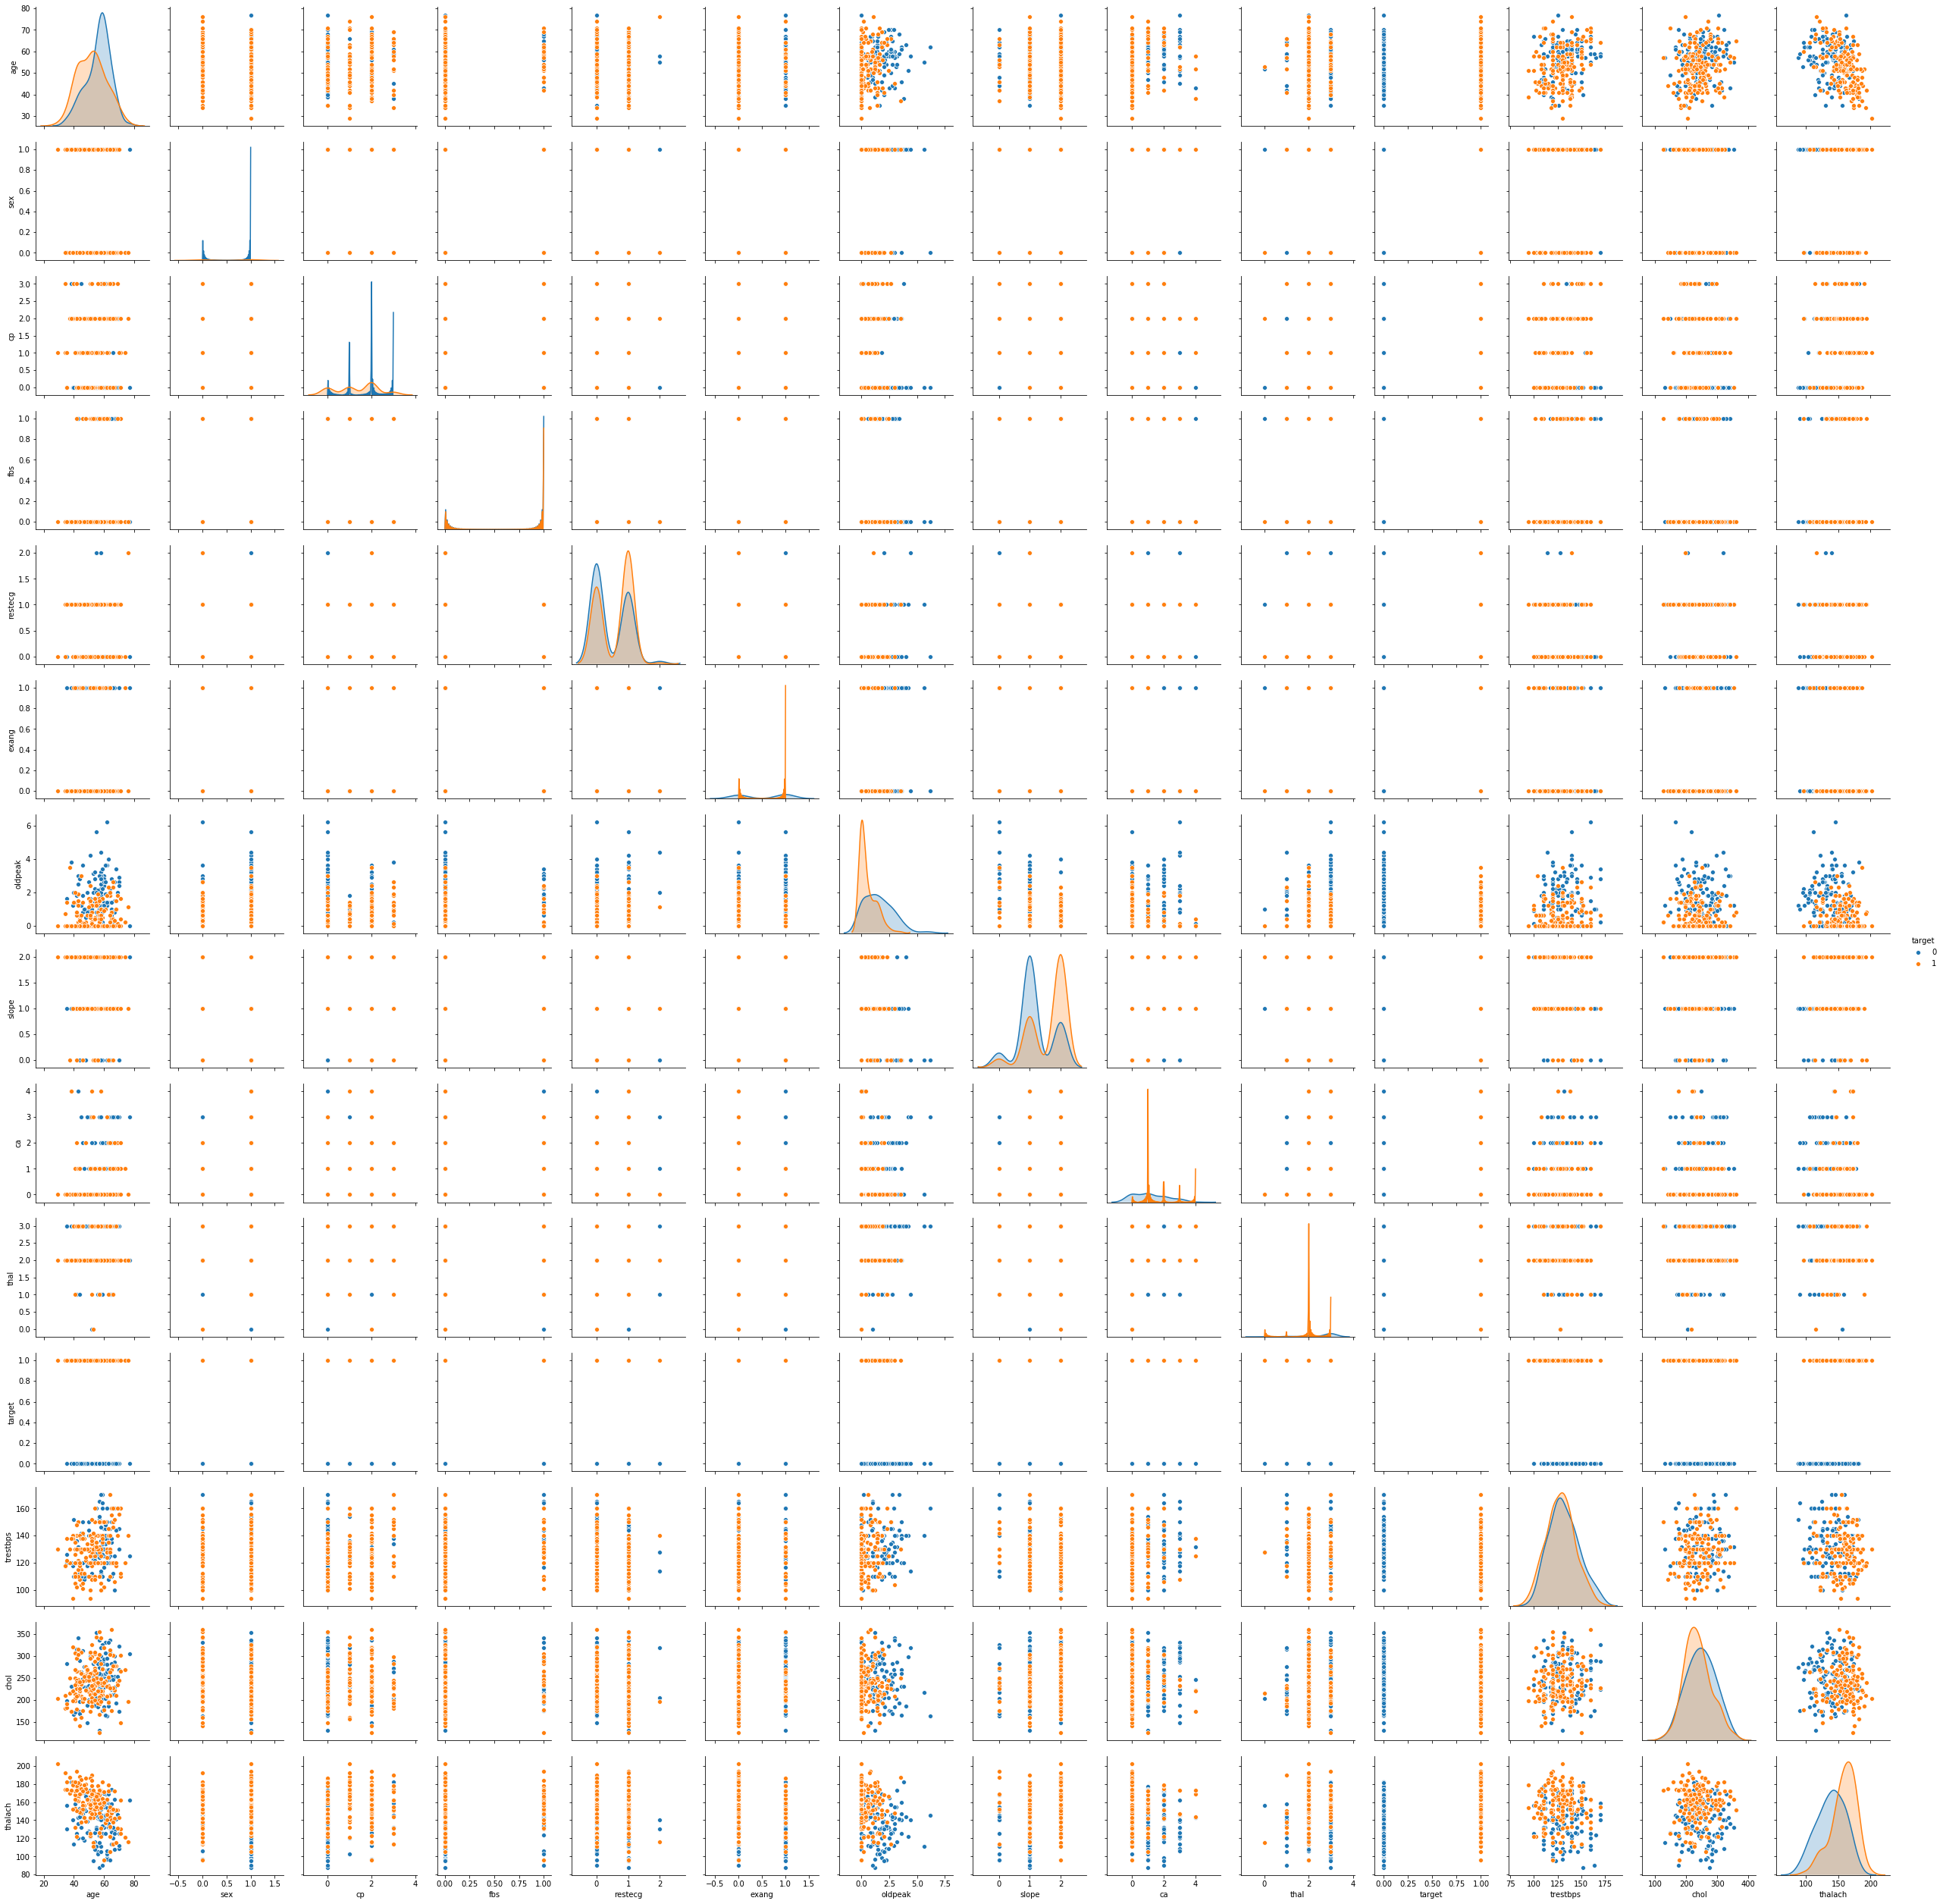

In [32]:
sns.pairplot(df, hue = "target") #shows all pairs

C:\Users\Renee\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


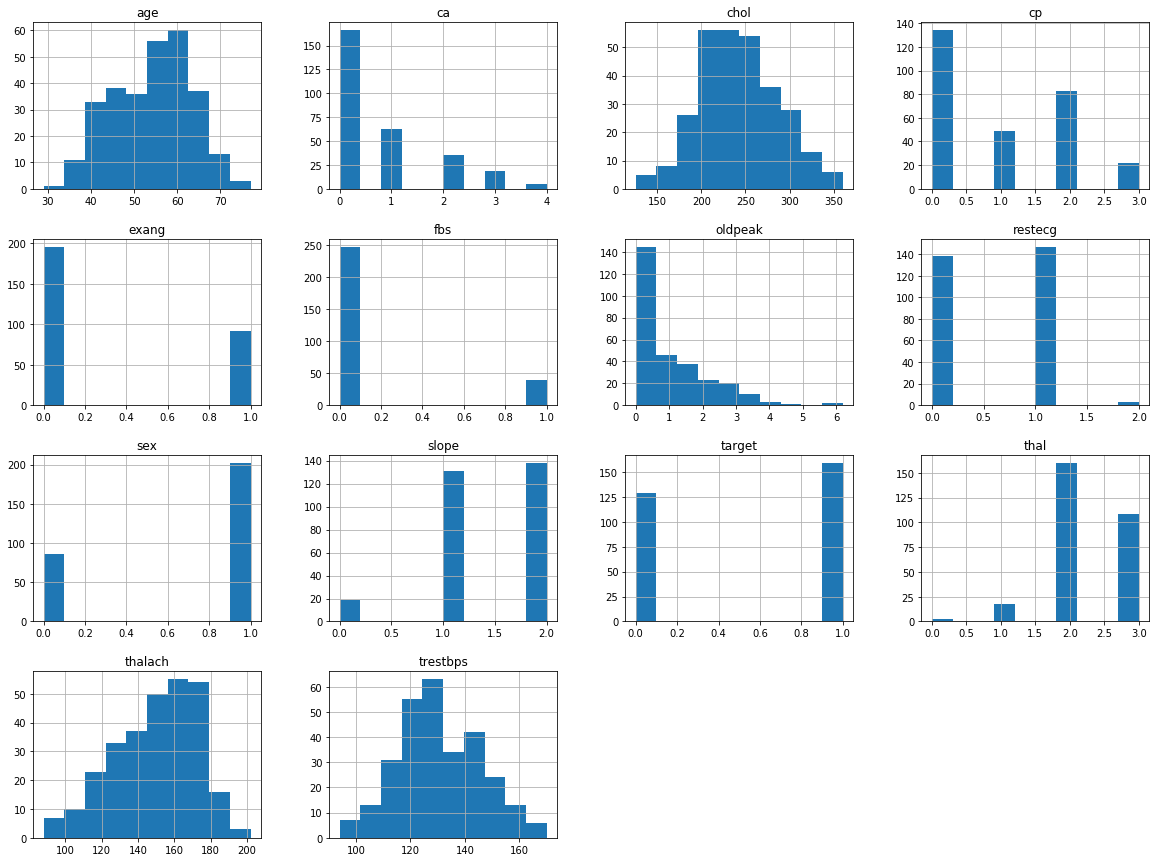

In [33]:
#Look at data spread within each feature
fig=plt.figure(figsize=(20,15))
ax=fig.gca()
df.hist(ax=ax)
plt.show()
#age, chol, thalach and trestbps share similar distributions
    #chol = cholesterol
    #thalach = max HR
    #trestbps = resting bp

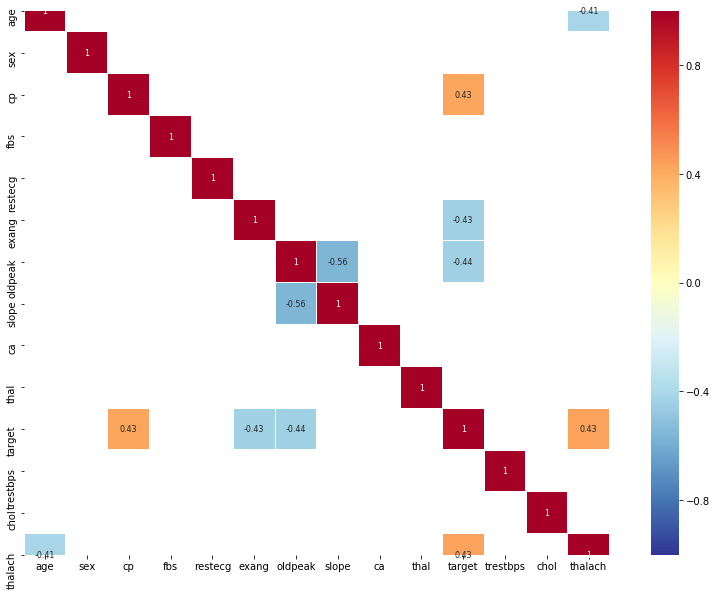

In [34]:
#Look for specific correlations
corr = df.corr()

plt.figure(figsize=(15,10))
sns.heatmap(corr[(corr >= 0.4) | (corr <= -0.4)],
            cmap = plt.cm.RdYlBu_r, vmax = 1.0, vmin = -1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square = True);

#### Largest correlations between the following:
 - oldpeak v. slope (-.56)
  - oldpeak = (ST depression induced by exercise)
  - slope = peak exercise ST
 - exang v. target (-.43)
  - exang = exercise induced angina
 - oldpeak v. target (-.44)
 - cp v. target (0.43)
  - cp = chest pain type
 - thalach v. target (0.43)
  - thalach = max HR achieved

### Exploring High Correlation Features Relative to Age

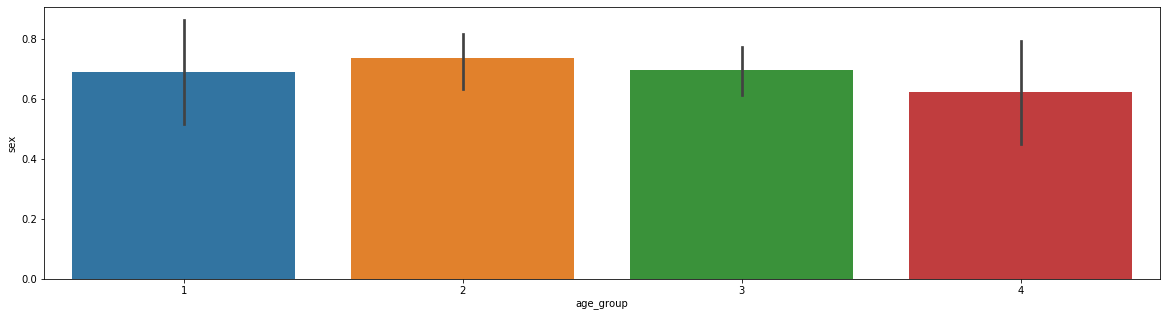

In [35]:
df['age']=df['age']
bins=[28,41,53,65,77]
labels=["1","2","3","4"]
df['age_group']=pd.cut(df['age'],bins,labels=labels)
fig=plt.figure(figsize=(20,5))
sns.barplot(x='age_group',y='sex',data=df)
plt.show()
#Fairly even age distribution within population

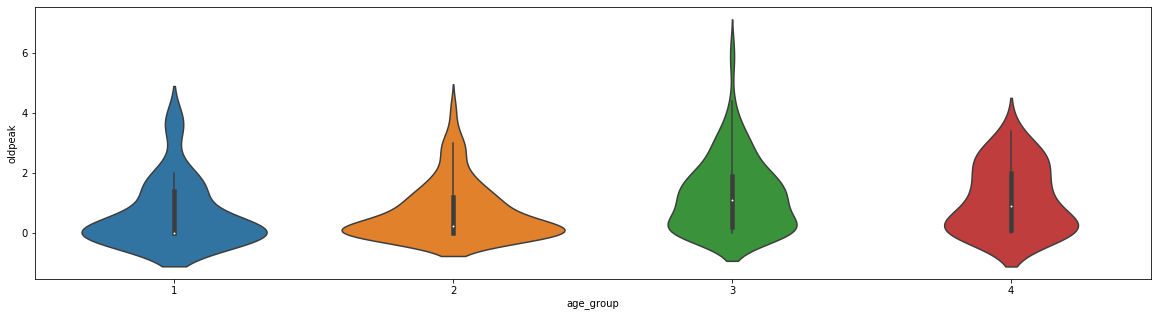

In [36]:
#Use violin plot to help see distribution
fig=plt.figure(figsize=(20,5))
sns.violinplot(x = 'age_group', y = 'oldpeak', data = df)
plt.show()
#Young adults typically do not have ST depression induced by exercise. Increases with age.

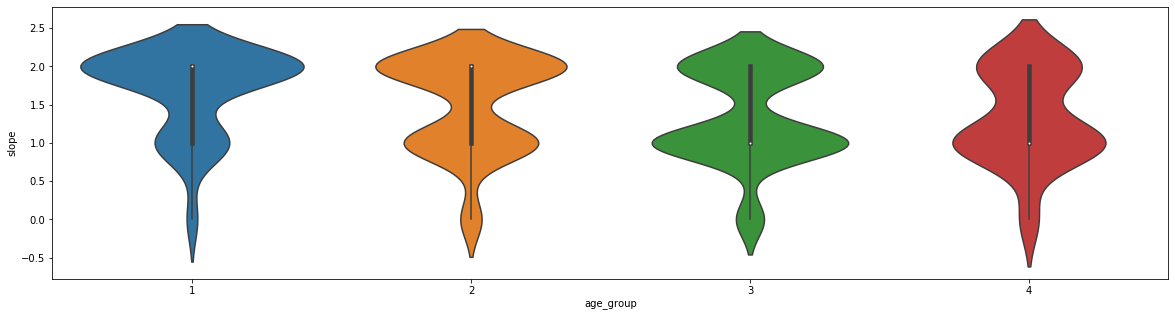

In [37]:
fig=plt.figure(figsize=(20,5))
sns.violinplot(x = 'age_group', y = 'slope', data = df)
plt.show()
#young adult and early adult both have majority 2
#adult and senior have majority 1. Lower peak exercise when older?

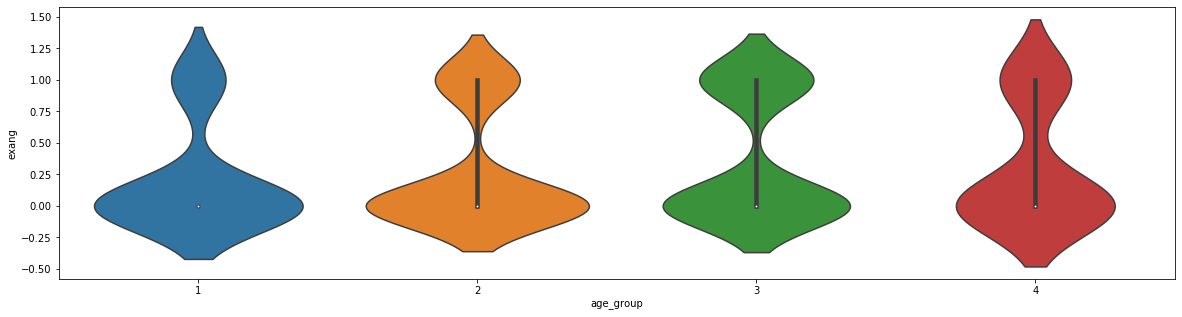

In [38]:
fig=plt.figure(figsize=(20,5))
sns.violinplot(x = 'age_group', y = 'exang', data = df)
plt.show()
#all age ranges have more people who do not have exang (0 = no)

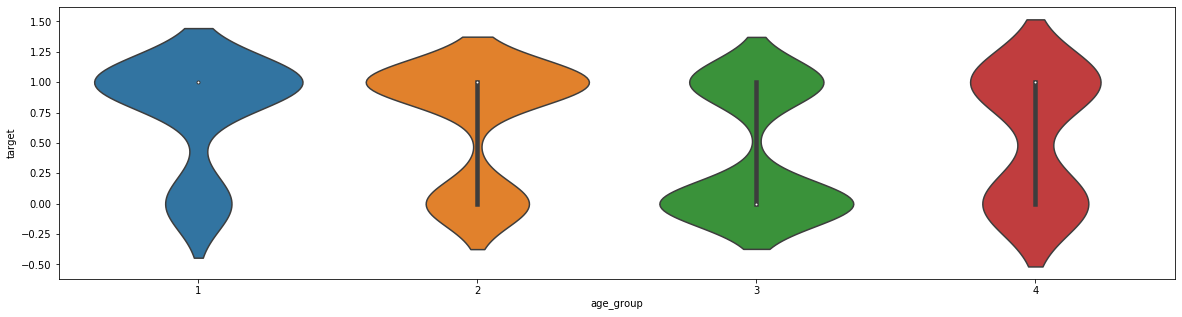

In [39]:
fig=plt.figure(figsize=(20,5))
sns.violinplot(x = 'age_group', y = 'target', data = df)
plt.show()
#young adult has majority no
#adult age range has more highest population with heart disease
#seniors even out

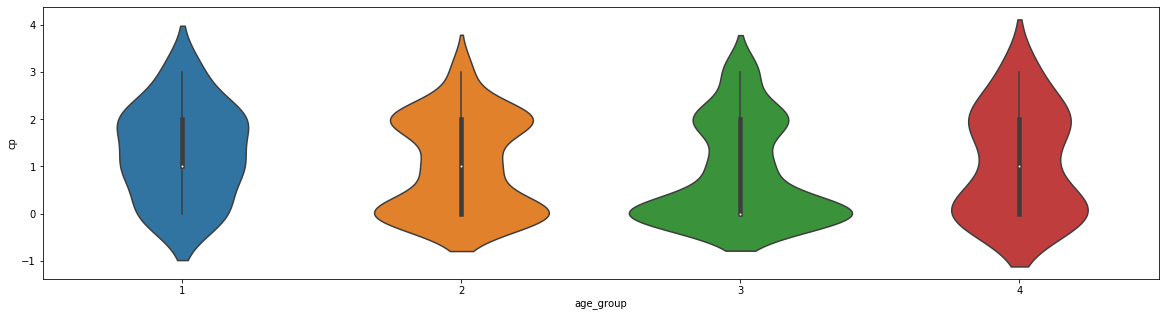

In [40]:
fig=plt.figure(figsize=(20,5))
sns.violinplot(x = 'age_group', y = 'cp', data = df)
plt.show()
#cp type adult and senior majority at 0

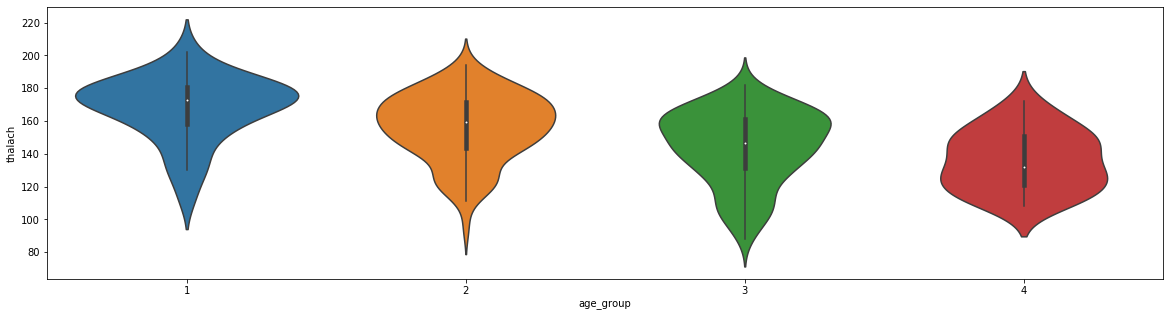

In [41]:
fig=plt.figure(figsize=(20,5))
sns.violinplot(x = 'age_group', y = 'thalach', data = df)
plt.show()
#Later ages' majority at lower HR

### Age Relevant Features:
 - thalach
 - cp
 - target
 - slope
 - oldpeak

## Logistic Regression Modeling
All training sets are have a train/test split of 80/20 because the dataset is small. While the test set may consequently have more variance, 
### Logistic Regression Model 1
Using all features to set a baseline accuracy.

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [65]:
#data after feature engineering and removing outliers
df

,age,sex,cp,fbs,restecg,exang,oldpeak,slope,ca,thal,target,trestbps,chol,thalach,age_group
0,63,1,3,1,0,0,2.3,0,0,1,1,145.0,233.0,150.0,3
1,37,1,2,0,1,0,3.5,0,0,2,1,130.0,250.0,187.0,1
2,41,0,1,0,0,0,1.4,2,0,2,1,130.0,204.0,172.0,1
3,56,1,1,0,1,0,0.8,2,0,2,1,120.0,236.0,178.0,3
4,57,0,0,0,1,1,0.6,2,0,2,1,120.0,354.0,163.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,0,1,1,0.2,1,0,3,0,140.0,241.0,123.0,3
299,45,1,3,0,1,0,1.2,1,0,3,0,110.0,264.0,132.0,2
300,68,1,0,1,1,0,3.4,1,2,3,0,144.0,193.0,141.0,4
301,57,1,0,0,1,1,1.2,1,1,3,0,130.0,131.0,115.0,3


In [66]:
#Drop Target from x to ensure 'target' is not a feature the model will be trained on. x is df without the 'target' column
x = df.drop(columns=['target'])
y = df['target']

In [67]:
#Split Train and Test Groups
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [68]:
x_train.shape

(201, 14)

In [69]:
x_test.shape

(87, 14)

In [70]:
#train model
my_model = LogisticRegression(random_state=0)
my_model.fit(x_train, y_train)

C:\Users\Renee\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [71]:
#predict using model
y_pred = my_model.predict(x_test)

In [72]:
#prediction
y_pred

array([1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1],
      dtype=int64)

In [73]:
#actual values
y_test.to_numpy()

array([1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1],
      dtype=int64)

In [74]:
#quantify how our model did (accuracy, (TP+TN)/(TP+TN+FP+FN))
#Sklearn has a score method that return a mean accuracy
my_model.score(x_test,y_test)

0.8620689655172413

### Logistic Regression Model #2
Using only factors that had a correlation greater than |0.4| to any other feature.
 - oldpeak v. slope (-.56)
 - exang v. target (-.43)
 - oldpeak v. target (-.44)
 - cp v. target (0.43)
 - thalach v. target (0.43)

In [75]:
columns = ['oldpeak', 'slope', 'exang', 'cp', 'thalach']
model2 = df[columns]
model2.head()

,oldpeak,slope,exang,cp,thalach
0,2.3,0,0,3,150.0
1,3.5,0,0,2,187.0
2,1.4,2,0,1,172.0
3,0.8,2,0,1,178.0
4,0.6,2,1,0,163.0


In [76]:
x=model2
#y remains the same as previous

#Split Train and Test Groups
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [77]:
model2_model = LogisticRegression(random_state=0)
model2_model.fit(x_train, y_train)
y_pred = model2_model.predict(x_test)
model2_model.score(x_test,y_test)

C:\Users\Renee\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.7816091954022989

####  Logistic Regression Model #3
Using factors that correlated most highly with age group (thalach, cp, slope, oldpeak).

In [80]:
columns = ['age','sex','thalach', 'cp', 'slope', 'oldpeak', 'age_group']
model3 = df[columns]
model3.head()

,age,sex,thalach,cp,slope,oldpeak,age_group
0,63,1,150.0,3,0,2.3,3
1,37,1,187.0,2,0,3.5,1
2,41,0,172.0,1,2,1.4,1
3,56,1,178.0,1,2,0.8,3
4,57,0,163.0,0,2,0.6,3


In [81]:
x=model3
#y remains the same as previous

#Split Train and Test Groups
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [82]:
model3_model = LogisticRegression(random_state=0)
model3_model.fit(x_train, y_train)
y_pred = model3_model.predict(x_test)
model3_model.score(x_test,y_test)

C:\Users\Renee\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8390804597701149

### Logistic Regression Model #4
Using that appeared most pertinent in EDA (only removing fbs, restecg, chol, and trestbps).

In [86]:
columns = ['sex', 'cp', 'exang', 'slope', 'age', 'thalach', 'oldpeak', 'ca', 'thal']
model4 = df[columns]
model4.head()

,sex,cp,exang,slope,age,thalach,oldpeak,ca,thal,restecg
0,1,3,0,0,63,150.0,2.3,0,1,0
1,1,2,0,0,37,187.0,3.5,0,2,1
2,0,1,0,2,41,172.0,1.4,0,2,0
3,1,1,0,2,56,178.0,0.8,0,2,1
4,0,0,1,2,57,163.0,0.6,0,2,1


In [87]:
x=model4
#y remains the same as previous

#Split Train and Test Groups
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [88]:
model4_model = LogisticRegression(random_state=0)
model4_model.fit(x_train, y_train)
y_pred = model4_model.predict(x_test)
model4_model.score(x_test,y_test)

C:\Users\Renee\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8735632183908046

### Concluding Thoughts
#### Model Accuracy Results:
 - Model 1: 86.2%
 - Model 2: 78.2%
 - Model 3: 83.9%
 - Model 4: 87.3%
 
My final model was the only model with higher accuracy than my original. My original expectation was that removing more features would help focus the model to only features with high correlations to heart disease diagnoses (Model 2).

However, after recalibrating and readding features as I continued to test and edit my model, my final model only removed features that had the least correlation to the target. 
 - fbs had a -2% correlation
 - restecg had a -15% correlation
 - trestbps had a -12% correlation
 - chol had an -11% correlation